<a href="https://colab.research.google.com/github/jderazoa/ML-con-PYTHON/blob/master/Formulario_de_riesgo_de_credito_con_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas en la práctica

## Cargando paquetes necesarios

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Preparando los datos

La variable `Target` indica si el paciente padece de una enfermedad del corazón. Siendo `1=si`, `0=no`

<img src="https://www.researchgate.net/profile/Bhuvaneswari_N_G/publication/261389750/figure/tbl1/AS:669279057879061@1536579970905/SUMMARY-OF-THE-HEART-DISEASE-DATASET.png" height=600px>


In [ ]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


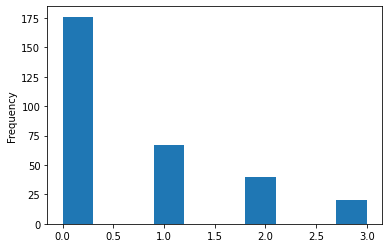

In [ ]:
df.ca.plot.hist()

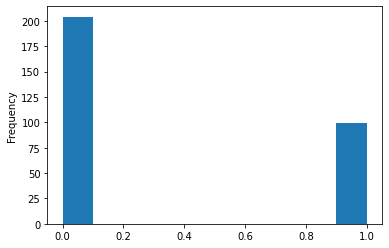

In [ ]:
df.exang.plot.hist()

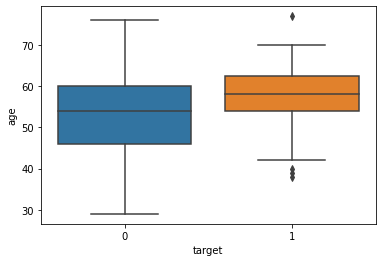

In [ ]:
import seaborn as sns
sns.boxplot(x = 'target', y = 'age', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [ ]:
df.thal.value_counts()

normal        168
reversible    115
fixed          18
1               1
2               1
Name: thal, dtype: int64

In [ ]:
!pip install sklearn_pandas

In [ ]:
df_transform.age.std()

1.0016542608495933

In [ ]:
from sklearn.model_selection import train_test_split
X = df_transform.iloc[:,:-1].to_numpy()
y = df_transform.iloc[:,-1].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Las dimensiones de los datos de entrenamiento son:', X_train.shape)
print('Las dimensiones de los datos de testeo son:', X_test.shape)
print('Las dimensiones del target de entrenamiento son:', y_train.shape)
print('Las dimensiones del target de testeo son:', y_test.shape)

Las dimensiones de los datos de entrenamiento son: (242, 19)
Las dimensiones de los datos de testeo son: (61, 19)
Las dimensiones del target de entrenamiento son: (242, 1)
Las dimensiones del target de testeo son: (61, 1)


## Generación del modelo

In [ ]:
x_in = layers.Input(shape=X.shape[1:]) # Preparese porque le van a llegar 19 columnas
x = layers.Dense(16)(x_in)    # Se crea una capa densa (escondida) con 32 neuronas (32 variables latentes) 
x = layers.Dropout(0.5)(x) # Elimina el 50% de neuronas. Esto hace la red neuronal mas inteligente. Se regula
y_out = layers.Dense(1, activation='sigmoid')(x) # Capa de salida sigmoide

modelo = keras.Model(x_in, y_out)

modelo.compile("adam", "binary_crossentropy", metrics=["accuracy"])

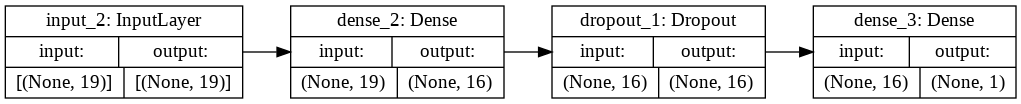

In [ ]:
keras.utils.plot_model(modelo, show_shapes=True, rankdir="LR")

In [ ]:
modelo.layers[1].get_weights()

[array([[-0.3435918 ,  0.1986151 ,  0.04880923, -0.08503632, -0.36328587,
         -0.12035894, -0.4773942 ,  0.21633779, -0.07872365, -0.2014125 ,
         -0.22355351, -0.42395613,  0.05409931,  0.12890232, -0.03641273,
          0.5863307 ],
        [ 0.16274397,  0.02660545,  0.00876859,  0.47041637, -0.23268574,
         -0.36565268, -0.20241253, -0.23928341, -0.10920304,  0.2950447 ,
         -0.4417816 , -0.4782284 , -0.25687453,  0.31467947,  0.16344748,
          0.33943304],
        [ 0.24182616,  0.02277497,  0.43200228, -0.11923379,  0.0321993 ,
         -0.48384976, -0.08453295,  0.25724506, -0.22103454,  0.17975661,
         -0.4173448 , -0.43419713, -0.30260038,  0.31911585,  0.57643276,
          0.14028016],
        [-0.31521782, -0.3234236 , -0.22605665, -0.3936638 ,  0.15126584,
         -0.30599847,  0.02845264,  0.00320084,  0.28616312, -0.00742493,
          0.13144192, -0.05204537,  0.28540683, -0.19660601,  0.23039462,
         -0.22532676],
        [ 0.05482293

Epoch 1/50
8/8 [==============================] - 1s 23ms/step - loss: 1.0603 - accuracy: 0.3430 - val_loss: 0.9745 - val_accuracy: 0.2951
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9776 - accuracy: 0.3843 - val_loss: 0.9144 - val_accuracy: 0.3279
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9038 - accuracy: 0.4669 - val_loss: 0.8633 - val_accuracy: 0.3770
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9289 - accuracy: 0.4628 - val_loss: 0.8156 - val_accuracy: 0.4426
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8177 - accuracy: 0.5041 - val_loss: 0.7727 - val_accuracy: 0.4918
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8362 - accuracy: 0.5000 - val_loss: 0.7345 - val_accuracy: 0.5410
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7176 - accuracy: 0.5702 - val_loss: 0.7003 - val_accuracy: 0.5738
Epoch 8/50
8/8 [=================

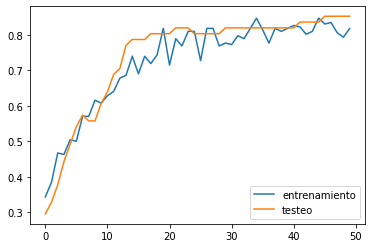

In [ ]:
import matplotlib.pyplot as plt
history = modelo.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'], label = 'entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'testeo')
plt.legend()

In [ ]:
y_prob = modelo.predict(X_test)
y_pred = y_prob > 0.5 # Con un valor evitan falsos positivos
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.75      0.71      0.73        17

    accuracy                           0.85        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.85      0.85      0.85        61



array([[40,  4],
       [ 5, 12]])

## Probando un modelo basado en árboles de decisión

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.45      0.53      0.49        17

    accuracy                           0.69        61
   macro avg       0.63      0.64      0.63        61
weighted avg       0.71      0.69      0.70        61



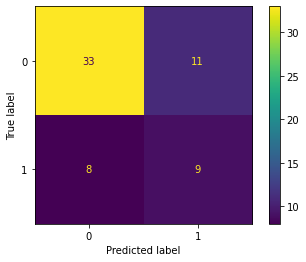

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
model_dtc = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_dtc,X_test,y_test)

Como se puede observar, el modelo basado en redes neuronales consigue un mejor F1-score. Por tanto es el que se usa enseguida.



In [ ]:
df.iloc[0]

age            63
sex             1
cp              1
trestbps      145
chol          233
fbs             1
restecg         2
thalach       150
exang           0
oldpeak       2.3
slope           3
ca              0
thal        fixed
target          0
Name: 0, dtype: object

## Pronosticando la probabilidad que un paciente sufra del corazón 

In [ ]:
#@title Inserte sus datos
edad =  90#@param {type:"integer"}
es_hombre = True #@param {type:"boolean"}
dolor_pecho = 4 #@param {type:"slider", min:0, max:4, step:1}
presion_arterial_en_reposo =  145#@param {type:"number"}
colesterol_cerica_mg_dl =  233#@param {type:"number"}
azucar_en_la_sangre_en_ayunas = True #@param {type:"boolean"}
resultado_electrocardiografico_en_reposo =  0#@param {type:"number"}
frecuencia_cardiaca_max =  150#@param {type:"number"}
angina_inducida_por_ejercicio = False #@param {type:"boolean"}
depresion_del_st_inducida_por_el_ejercicio_en_relacion_con_el_reposo = 2.3 #@param {type:"slider", min:0, max:7, step:0.1}
pendiente_segmento_st_ejercicio_pico = 1 #@param {type:"slider", min:1, max:3, step:1}
numero_de_vasos_principales_coloreados_por_floracion = 0 #@param {type:"slider", min:0, max:3, step:1}
normal = "fixed" #@param ["fixed", "normal", "reversible", "1", "2"]


In [ ]:
age = edad
sex = int(es_hombre)
cp = dolor_pecho
trestbps = presion_arterial_en_reposo
chol= colesterol_cerica_mg_dl
fbs= int(azucar_en_la_sangre_en_ayunas)
restecg= resultado_electrocardiografico_en_reposo
thalach=frecuencia_cardiaca_max
exang=int(angina_inducida_por_ejercicio)
oldpeak= depresion_del_st_inducida_por_el_ejercicio_en_relacion_con_el_reposo
slope=pendiente_segmento_st_ejercicio_pico
ca=numero_de_vasos_principales_coloreados_por_floracion
thal= normal

entrada = pd.DataFrame({'age': [age], 'sex': [sex], 'cp': [cp], 'trestbps': [trestbps],
             'chol': [chol], 'fbs': [fbs], 'restecg': [restecg], 'thalach': [thalach],
             'exang': [exang], 'oldpeak': [oldpeak], 'slope': [slope],
             'ca': [ca], 'thal': [thal], 'target': [0]})

print(entrada)
ejemplo = mapper.transform(entrada).iloc[:,:-1].to_numpy()
probabilidad = round(modelo.predict(ejemplo)[0][0]*100)
print('La probabilidad que este paciente sufra una enfermedad del corazon es:',
      probabilidad, '%')


   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca   thal  target
0   90    1   4       145   233    1  ...      0      2.3      1   0  fixed       0

[1 rows x 14 columns]
La probabilidad que este paciente sufra una enfermedad del corazon es: 84 %


In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491664 sha256=f98700b4fa213b4995ee15df2911d0f752c1b767fb29ae1f726e499c0fa25d58
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
def f(X):
  return modelo.predict([X[:,i] for i in range(X.shape[1])]).flatten()

explainer = shap.KernelExplainer(f, X[:50,:])
# shap_values = explainer.shap_values(X[299,:], nsamples=500)
# shap.force_plot(explainer.expected_value, shap_values, X[299,:])

In [ ]:
# KernelExplainer is a general approach that can work with any ML framework
# Its inputs are the predictions and training data

# # Summarize the training set to accelerate analysis
# X1 = shap.kmeans(X, 25)

# Instantiate an explainer with the model predictions and training data summary
explainer = shap.KernelExplainer(modelo.predict, X)

# Extract Shapley values from the explainer
shap_values = explainer.shap_values(X)

Using 303 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values[0], X)